In [0]:
import numpy as np
import math  
from matplotlib import pyplot as plt
from skimage.measure import compare_mse
from PIL import Image
import cv2

In [0]:
class Image(object):
  def __init__(self, path):
    self.path = path

    self.rgb_image = None
    self.bgr_image = None
    self.gray_image = None


  def read_image(self, return_image = False):
    self.rgb_image = plt.imread(self.path)
    if return_image:
      return self.rgb_image


  def bgr(self, return_image = False):
    self.bgr_image = np.flip(plt.imread(self.path), 2)
    if return_image:
      return self.bgr_image


  def gray(self, return_image = False):
    self.gray_image = cv2.cvtColor(plt.imread(self.path), cv2.COLOR_RGB2GRAY)
    if return_image:
      return self.gray_image


  def show(self, image, title = 'image'):
    if len(image.shape) == 3:
      plt.imshow(image)
    else:
      plt.imshow(image, cmap = 'gray')

    plt.title(title)


  def show_all(self, image_list, title_list):
    assert len(image_list) == len(title_list), "Incompatible lengths of lists!"
    N = len(image_list)
    plt.figure(figsize=[20, 20])

    for i in range(N):
      plt.subplot(1, N, i + 1)
      self.show(image_list[i], title_list[i])
    
    plt.show()

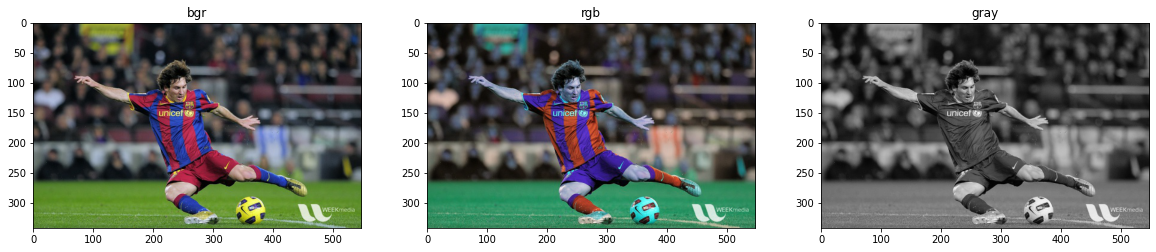

In [0]:
image = Image("./messi.jpg")
rgb = image.read_image(True)
bgr = image.bgr(True)
gray = image.gray(True)
image.show_all([rgb, bgr, gray], ["bgr", "rgb", "gray"])

In [0]:
def current_iteration_convolve2d(current_mat, kernel):
  assert current_mat.shape[0] == kernel.shape[0] and current_mat.shape[1] == kernel.shape[1], "Incompatible sizes of matrices!"
  
  sum = 0
  for row_current_mat, row_kernel in zip(current_mat, kernel):
    sum += np.dot(row_current_mat, row_kernel)
  return sum


def rgb_current_iteration_convolve2d(current_mat, kernel):
  rgb_sums = np.zeros(3)

  red_sum = current_mat[:, :, 0]
  green_sum = current_mat[:, :, 1]
  blue_sum = current_mat[:, :, 2]

  rgb_sums[0] = current_iteration_convolve2d(red_mat, kernel)
  rgb_sums[1] = current_iteration_convolve2d(green_mat, kernel)
  rgb_sums[2] = current_iteration_convolve2d(blue_mat, kernel) 

  return rgb_matrices


def convolve2d(image, kernel):
  image = cv2.normalize(image, None, alpha=0, beta=1,
                        norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
  
  if len(image.shape) < 3: # A gray image
    new_shape = (image.shape[0] - kernel.shape[0] + 1,
                 image.shape[1] - kernel.shape[1] + 1)
  else: # RGB image
    new_shape = (image.shape[0] - kernel.shape[0] + 1,
                 image.shape[1] - kernel.shape[1] + 1, 3)
  
  kernel = kernel[::-1] # Flip kernel by 180 degrees
  new_image = np.zeros(new_shape)
  for i in range(new_shape[0]):
    for j in range(new_shape[1]):
      current_mat = image[i : i + kernel.shape[0], j : j + kernel.shape[1]]

      if len(image.shape) < 3: # A gray image
        current_sum = current_iteration_convolve2d(current_mat, kernel)
        new_image[i][j] = current_sum
      else: # RGB image
        current_sum = rgb_current_iteration_convolve2d(current_mat, kernel)
        new_image[i][j][0] = current_sum[0] # Red
        new_image[i][j][1] = current_sum[1] # Green
        new_image[i][j][2] = current_sum[2] # Blue

  return new_image

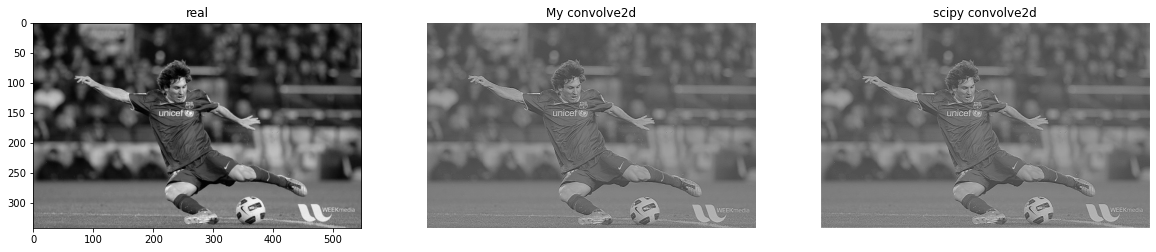

In [0]:
kernel = np.array([[0, -2, 0], [-1, 8, -1], [0, -1, 0]]) / 4
image_equalized = gray / np.max(np.abs(gray))
image_kernel = convolve2d(gray, kernel)
plt.figure(figsize = [20, 10])
plt.subplot(131)
plt.imshow(image_equalized, cmap=plt.cm.gray)
plt.title('real')
plt.subplot(132)
plt.imshow(image_kernel, cmap=plt.cm.gray)
plt.title('My convolve2d')
plt.axis('off')

import scipy.signal
image_kernel2 = scipy.signal.convolve2d(image_equalized, kernel, 'same')
plt.subplot(133)
plt.imshow(image_kernel2, cmap=plt.cm.gray)
plt.title("scipy convolve2d")
plt.axis('off')
plt.show()

In [0]:
# Filters are a set of uniqe operations on images, which affect on images' 
# vision, according to some preferences. For example: blurring, sharpening,
# embossing, edge detection, and more. These operations are made by 
# the convolution method, which takes the image and the kind of filter
# (called kernel), represented by it's specific matrix, as arguments. The kernel
# matrix is also called "Convolution matrix" or "Mask". The result of the
# convolution method is a new image, filtered by the given kernel.
# The kernel used in the exercise above, is a sharpening filter, making the new 
# image sharper than before.

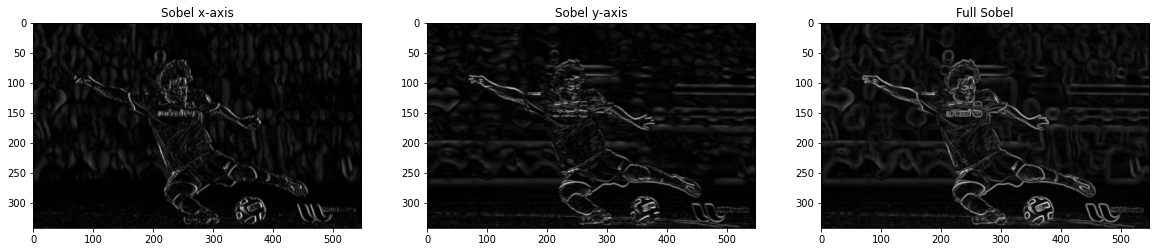

In [0]:
def plot_sobel(gray_img):
  gray_img = cv2.normalize(gray_img, None, alpha=0, beta=1,
                        norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_64F)
    
  dest1 = cv2.Sobel(gray_img, cv2.CV_64F, 1, 0, ksize=5)
  dest2 = cv2.Sobel(gray_img, cv2.CV_64F, 0, 1, ksize=5)
  dest3 = np.sqrt(np.power(dest1, 2) + np.power(dest2, 2))

  plt.figure(figsize = [20, 10])

  plt.subplot(131)
  plt.imshow(abs(dest1), cmap='gray')
  plt.title("Sobel x-axis")

  plt.subplot(132)
  plt.imshow(abs(dest2), cmap='gray')
  plt.title("Sobel y-axis")

  plt.subplot(133)
  plt.imshow(abs(dest3), cmap='gray')
  plt.title("Full Sobel")

  plt.show()

plot_sobel(image.gray(True))

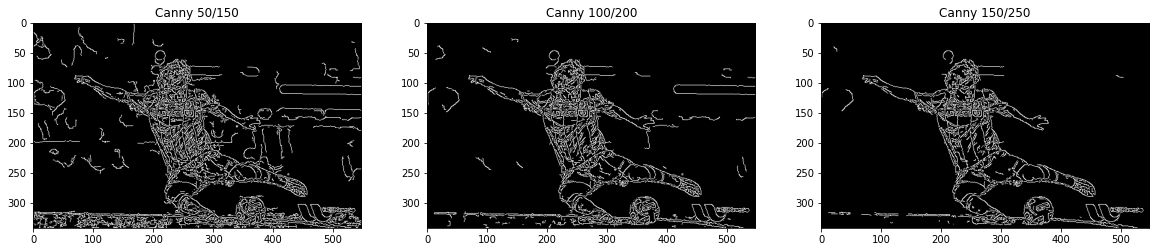

In [0]:
def plot_canny_edge_detection(img):
  temp = (img * 255).astype(np.uint8)

  dest1 = cv2.Canny(temp, 50, 150)
  dest2 = cv2.Canny(temp, 100, 200)
  dest3 = cv2.Canny(temp, 150, 250)

  plt.figure(figsize = [20, 10])

  plt.subplot(131)
  plt.imshow(dest1, cmap='gray')
  plt.title("Canny 50/150")

  plt.subplot(132)
  plt.imshow(dest2, cmap='gray')
  plt.title("Canny 100/200")

  plt.subplot(133)
  plt.imshow(dest3, cmap='gray')
  plt.title("Canny 150/250")

  plt.show()

plot_canny_edge_detection(image.read_image(True))

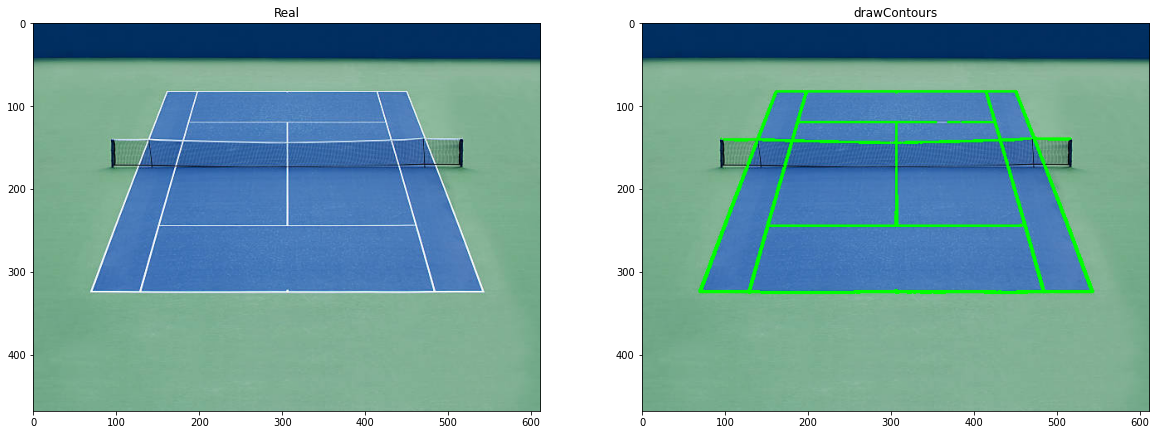

In [0]:
def threshold(gray_img, val):
  new_img = np.copy(gray_img)

  for i in range(new_img.shape[0]):
    for j in range(new_img.shape[1]):
      if new_img[i][j] > val:
        new_img[i][j] = 255
      else:
        new_img[i][j] = 0

  return new_img


def find_shapes(img):
  thresh = threshold(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY), 200)
  new_img = np.copy(img)

  contours, hierarchy = cv2.findContours(thresh, 
                                  cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
  cv2.drawContours(new_img, contours, -1, (0, 255, 0), 2)

  plt.figure(figsize = [20, 10])

  plt.subplot(121)
  plt.imshow(img)
  plt.title("Real")

  plt.subplot(122)
  plt.imshow(new_img)
  plt.title("drawContours")

court_image = Image("./court.jpg")
find_shapes(court_image.read_image(True))

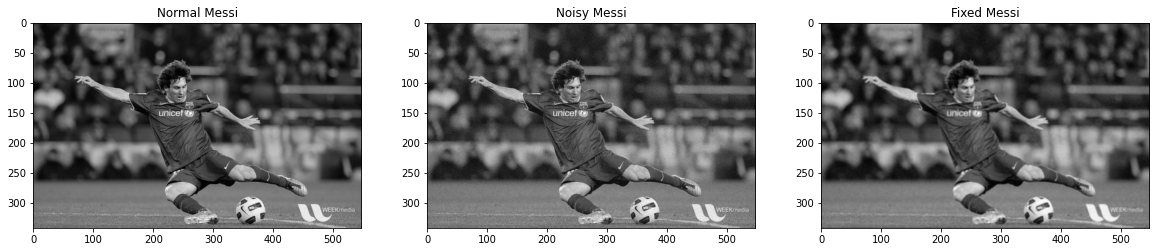

In [0]:
def gaussian_noise(img, mean, standard_deviation):  
  # standard_deviation = sigma
  gauss = np.random.normal(mean, standard_deviation, img.shape)
  return img + gauss


def fix_gaussian_noise(gaussian_noisy_img):
  gaussian_kernel = np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]]) / 16
  image_equalized = gaussian_noisy_img / np.max(np.abs(gaussian_noisy_img))
  return scipy.signal.convolve2d(image_equalized, gaussian_kernel, 'same')


gray_messi = image.gray(True)
noisy_gray_messi = gaussian_noise(gray_messi, 0, 5)
fixed_gray_messi = fix_gaussian_noise(noisy_gray_messi)

image.show_all([gray_messi, noisy_gray_messi, fixed_gray_messi], 
               ["Normal Messi", "Noisy Messi", "Fixed Messi"])

In [0]:
def L1(img1, img2): # Calculates L1 norm between two images
  return abs(np.sum(img1) - np.sum(img2))


norm1 = L1(gray_messi, noisy_gray_messi)
norm2 = L1(gray_messi, fixed_gray_messi)
norm3 = L1(fixed_gray_messi, noisy_gray_messi)

mse1 = compare_mse(gray_messi, noisy_gray_messi)
mse2 = compare_mse(gray_messi, fixed_gray_messi)
mse3 = compare_mse(fixed_gray_messi, noisy_gray_messi)

flag1 =  np.array_equal(gray_messi, noisy_gray_messi)
flag2 = np.array_equal(gray_messi, fixed_gray_messi)
flag3 = np.array_equal(fixed_gray_messi, noisy_gray_messi)

print('Normal Image - Noisy Image :\nMSE: ' + str(mse1) + 
      '\nAbsoulute Error: ' + str(norm1) + 
      '\nHistogram Comparison: ' + str(flag1) + '\n\n*********************\n')


print('Normal Image - Filtered Image :\nMSE: ' + str(mse2) + 
      '\nAbsoulute Error: ' + str(norm2) + 
      '\nHistogram Comparison: ' + str(flag2) + '\n\n*********************\n')


print('Filtered Image - Noisy Image :\nMSE: ' + str(mse3) + 
      '\nAbsoulute Error: ' + str(norm3) + 
      '\nHistogram Comparison: ' + str(flag3) + '\n')

Normal Image - Noisy Image :
MSE: 24.959616118257742
Absoulute Error: 291.40607118979096
Histogram Comparison: False

*********************

Normal Image - Filtered Image :
MSE: 9024.665272540691
Absoulute Error: 15554921.190664267
Histogram Comparison: False

*********************

Filtered Image - Noisy Image :
MSE: 9048.528509147283
Absoulute Error: 15555212.596735457
Histogram Comparison: False



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: DEPRECATED: skimage.measure.compare_mse has been moved to skimage.metrics.mean_squared_error. It will be removed from skimage.measure in version 0.18.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: DEPRECATED: skimage.measure.compare_mse has been moved to skimage.metrics.mean_squared_error. It will be removed from skimage.measure in version 0.18.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: DEPRECATED: skimage.measure.compare_mse has been moved to skimage.metrics.mean_squared_error. It will be removed from skimage.measure in version 0.18.
  # This is added back by InteractiveShellApp.init_path()


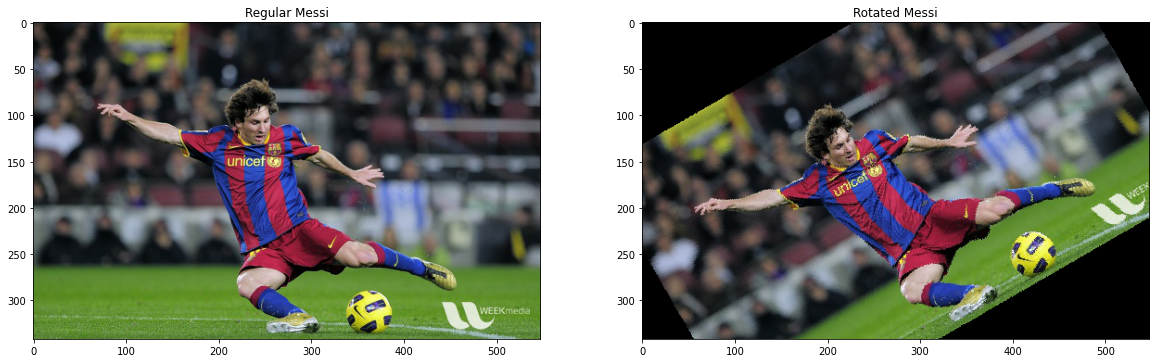

In [0]:
def rotate_img(img, theta = 0):
  if len(img.shape) == 2: # A gray image
    extension = int((img.shape[0]**2 + img.shape[1]**2)**0.5)
    new_img = np.zeros((img.shape[0] + extension, img.shape[1] + extension))
  else: # RGB image
    img = cv2.normalize(img, None, alpha=0, beta=1,
                      norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_64F)
    
    extension = int((img.shape[0]**2 + img.shape[1]**2)**0.5)
    new_img = np.zeros((img.shape[0] + extension , img.shape[1] + extension, 3))

  center = int(img.shape[0] / 2), int(img.shape[1] / 2)
  radius = int((center[0] ** 2 + center[1] ** 2) ** 0.5)
  radians_to_add = theta * math.pi / 180

  for current_radius in range(1, radius):
    for fi in range(360):
      for i in range(10):
        current_theta = fi + i / 10
        current_radians = current_theta * math.pi / 180

        axis1 = int(current_radius * math.cos(current_radians)) + center[0]
        axis2 = int(current_radius * math.sin(current_radians)) + center[1]
        rotated_axis1 = int(current_radius * math.cos(current_radians + radians_to_add)) + center[0]
        rotated_axis2 = int(current_radius * math.sin(current_radians + radians_to_add)) + center[1]

        if len(img.shape) == 3:
          if 0 <= rotated_axis1 < img.shape[0] and 0 <= rotated_axis2 < img.shape[1] and 0 <= axis1 < img.shape[0] and 0 <= axis2 < img.shape[1]:
            for i in range(img.shape[2]):
              new_img[rotated_axis1][rotated_axis2][i] = img[axis1][axis2][i]
        elif 0 <= rotated_axis1 < img.shape[0] and 0 <= rotated_axis2 < img.shape[1] and 0 <= axis1 < img.shape[0] and 0 <= axis2 < img.shape[1]:
            new_img[rotated_axis1][rotated_axis2] = img[axis1][axis2]
      
  return new_img[:img.shape[0], :img.shape[1]]


#new_img = np.zeros(rgb.shape)
#plt.imshow(new_img)
image = Image('./messi.jpg')
messi = image.read_image(True)
spinned_messi = rotate_img(messi, 30)
image.show_all([messi, spinned_messi], ['Regular Messi', 'Rotated Messi'])

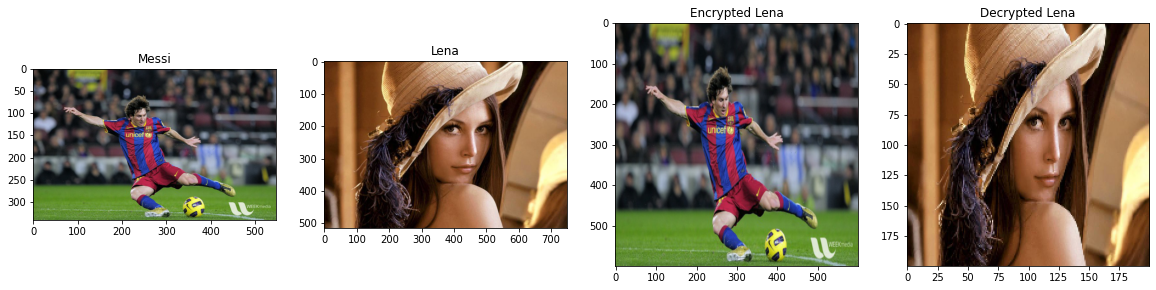

In [0]:
def encrypt_img(src_img, key_img):
  temp_src_img = cv2.resize(src_img, (600, 600)).astype(np.uint8)
  temp_key_img = cv2.resize(key_img, (200, 200)).astype(np.uint8)
  encrypted_img = np.copy(temp_src_img)

  representative_bits = [0] * 8
  for i in range(0, temp_key_img.shape[0]):
    for j in range(0, temp_key_img.shape[1]):
      for k in range(0, temp_key_img.shape[2]):
        for t in range(8):
            representative_bits[t] = 1 & temp_key_img[i][j][k] >> t

            # 1 - Encryption
            if representative_bits[0] == 0:
                encrypted_img[i][j][k] = temp_src_img[i][j][k] & ~1
            else:
                encrypted_img[i][j][k] = temp_src_img[i][j][k] | 1

            # 2 - Encryption
            if representative_bits[1] == 0:
                encrypted_img[i][j + 200][k] = temp_src_img[i][j + 200][k] & ~1
            else:
                encrypted_img[i][j + 200][k] = temp_src_img[i][j + 200][k] | 1

            # 3 - Encryption
            if representative_bits[2] == 0:
                encrypted_img[i][j + 400][k] = temp_src_img[i][j + 400][k] & ~1
            else:
                encrypted_img[i][j + 400][k] = temp_src_img[i][j + 400][k] | 1

            # 4 - Encryption
            if representative_bits[3] == 0:
                encrypted_img[i + 200][j][k] = temp_src_img[i + 200][j][k] & ~1
            else:
                encrypted_img[i + 200][j][k] = temp_src_img[i + 200][j][k] | 1

            # 5 - Encryption
            if representative_bits[4] == 0:
                encrypted_img[i + 200][j + 200][k] = temp_src_img[i + 200][j + 200][k] & ~1
            else:
                encrypted_img[i + 200][j + 200][k] = temp_src_img[i + 200][j + 200][k] | 1

            # 6 - Encryption
            if representative_bits[5] == 0:
                encrypted_img[i + 200][j + 400][k] = temp_src_img[i + 200][j + 400][k] & ~1
            else:
                encrypted_img[i + 200][j + 400][k] = temp_src_img[i + 200][j + 400][k] | 1

            # 7 - Encryption
            if representative_bits[6] == 0:
                encrypted_img[i + 400][j][k] = temp_src_img[i + 400][j][k] & ~1
            else:
                encrypted_img[i + 400][j][k] = temp_src_img[i + 400][j][k] | 1

            # 8 - Encryption
            if representative_bits[7] == 0:
                encrypted_img[i + 400][j + 200][k] = temp_src_img[i + 400][j + 200][k] & ~1
            else:
                encrypted_img[i + 400][j + 200][k] = temp_src_img[i + 400][j + 200][k] | 1

  return encrypted_img


def convert_bin_lst_to_int(lst):
  current_num = 0
  for bit in range(len(lst) - 1, -1, -1):
    current_num += lst[bit] * (2**bit)
  return int(current_num)


def decrypt_img(encrypted_img):
  decrypted_img = np.zeros((int(encrypted_img.shape[0] / 3), int(encrypted_img.shape[1] / 3), encrypted_img.shape[2])).astype(np.uint8)
  encrypted_img = encrypted_img.astype(np.uint8)
  representative_bits = [0] * 8
  
  for i in range(decrypted_img.shape[0]):
    for j in range(decrypted_img.shape[1]):
      for k in range(decrypted_img.shape[2]):
        # 1 - Decrypt
        representative_bits[0] = int(encrypted_img[i][j][k]) & 1

        # 2 - Decrypt
        representative_bits[1] = int(encrypted_img[i][j + 200][k]) & 1

        # 3 - Decrypt
        representative_bits[2] = int(encrypted_img[i][j + 400][k]) & 1

        # 4 - Decrypt
        representative_bits[3] = int(encrypted_img[i + 200][j][k]) & 1

        # 5 - Decrypt
        representative_bits[4] = int(encrypted_img[i + 200][j + 200][k]) & 1

        # 6 - Decrypt
        representative_bits[5] = int(encrypted_img[i + 200][j + 400][k]) & 1

        # 7 - Decrypt
        representative_bits[6] = int(encrypted_img[i + 400][j][k]) & 1

        # 8 - Decrypt
        representative_bits[7] = int(encrypted_img[i + 400][j + 200][k]) & 1

        decrypted_img[i][j][k] = convert_bin_lst_to_int(representative_bits)
  return decrypted_img.astype(np.uint8)


messi = Image('./messi.jpg').read_image(True)
lena = Image('./lena.jpg').read_image(True)

encrypted_lena = encrypt_img(messi, lena)
decrypted_lena = decrypt_img(encryption)

image.show_all([messi, lena, encrypted_lena, decrypted_lena], ["Messi", "Lena", "Encrypted Lena", "Decrypted Lena"])